In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the Excel file
data = pd.read_excel("default of credit card clients.xls")

# Display the first few rows of the data
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
# Set the second row as column names and drop the first row
data.columns = data.iloc[0]  # Set the second row as header
data = data[1:]             # Drop the first row (with X1, X2, ..., Y)

# Reset the index for better organization
data.reset_index(drop=True, inplace=True)

# Display the transformed data
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.drop(columns='ID',axis=1,inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Summary statistics
print(data.describe())

0       LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  PAY_3  \
count       30000  30000      30000     30000  30000  30000  30000  30000   
unique         81      2          7         4     56     11     11     11   
top         50000      2          2         2     29      0      0      0   
freq         3365  18112      14030     15964   1605  14737  15730  15764   

0       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
count   30000  30000  ...      30000      30000      30000     30000   
unique     11     10  ...      21548      21010      20604      7943   
top         0      0  ...          0          0          0         0   
freq    16455  16947  ...       3195       3506       4020      5249   

0       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
count      30000     30000     30000     30000     30000   
unique      7899      7518      6937      6897      6939   
top            0         0         0         0         0   
freq        5

In [7]:
# Check for missing values
print(data.isnull().sum())

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


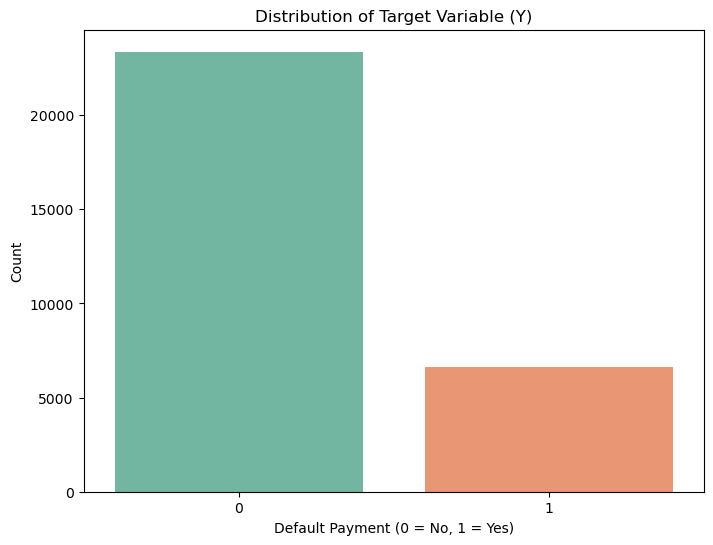

In [8]:
# Rename the target variable for easier access
data.rename(columns={"default payment next month": "Y"}, inplace=True)

# Plot the distribution of the target variable (Y)
plt.figure(figsize=(8, 6))
sns.countplot(x="Y", data=data, palette="Set2")
plt.title("Distribution of Target Variable (Y)")
plt.xlabel("Default Payment (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [9]:
#Address class imbalance

# Correlation Matrix Analysis

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  object
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  object
 5   PAY_0      30000 non-null  object
 6   PAY_2      30000 non-null  object
 7   PAY_3      30000 non-null  object
 8   PAY_4      30000 non-null  object
 9   PAY_5      30000 non-null  object
 10  PAY_6      30000 non-null  object
 11  BILL_AMT1  30000 non-null  object
 12  BILL_AMT2  30000 non-null  object
 13  BILL_AMT3  30000 non-null  object
 14  BILL_AMT4  30000 non-null  object
 15  BILL_AMT5  30000 non-null  object
 16  BILL_AMT6  30000 non-null  object
 17  PAY_AMT1   30000 non-null  object
 18  PAY_AMT2   30000 non-null  object
 19  PAY_AMT3   30000 non-null  object
 20  PAY_AMT4   30000 non-null  o

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

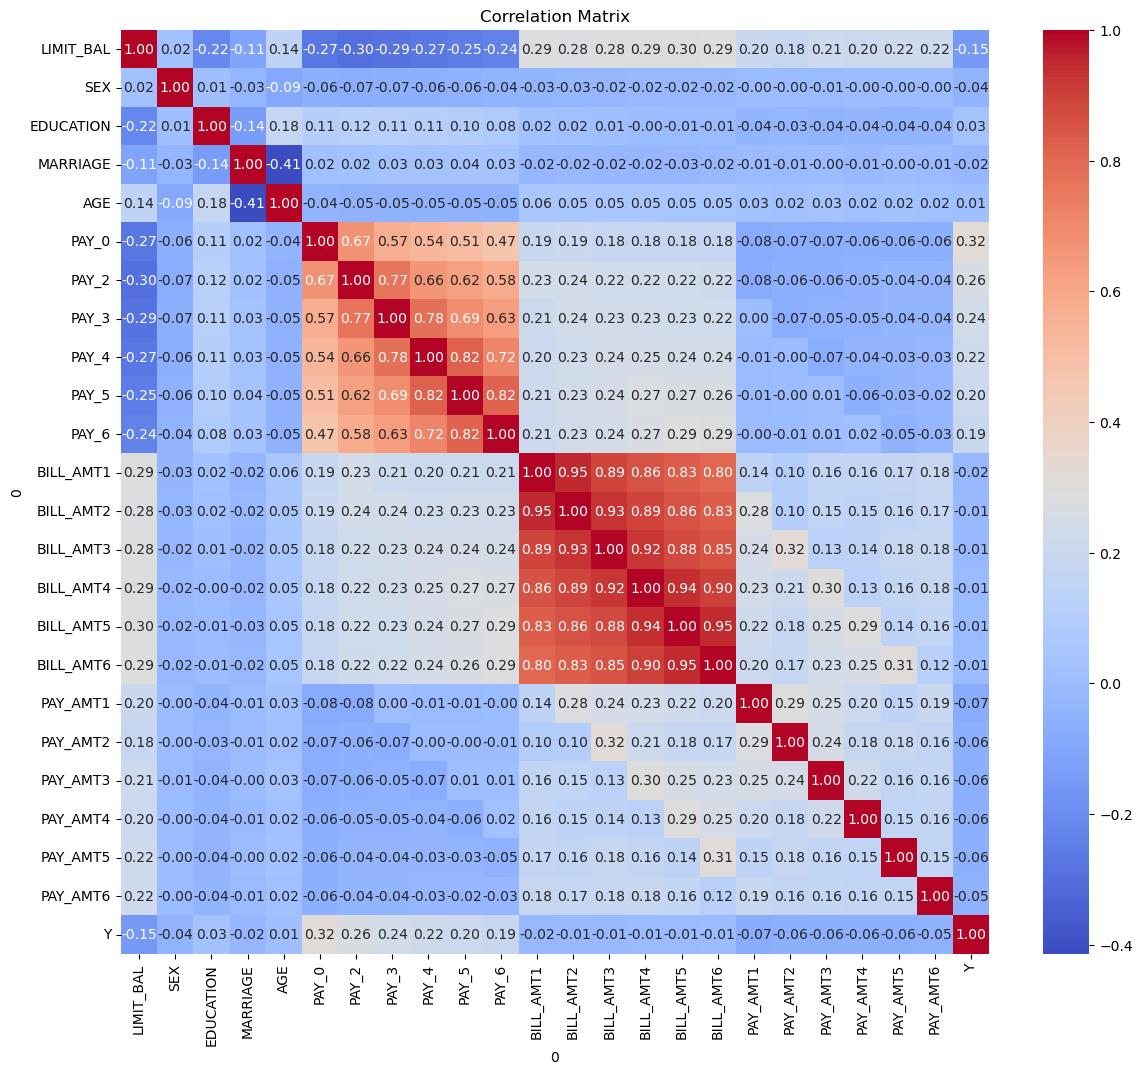

In [11]:
# Convert all columns to numeric, coercing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Check for successful conversion
print(data.info())  # Columns should now be int64 or float64

# Drop rows with NaN if needed
data = data.dropna()

# Recompute the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()


This **correlation matrix** reveals how strongly each pair of features (including the target variable `Y`) is correlated. 

---

### **Key Observations**
1. **`Y` (Default Payment Next Month) Correlation:**
   - `PAY_0` (most recent payment status): **0.32** – This is the strongest positive correlation with `Y`.
     - Clients with delayed or defaulted payments (`PAY_0` > 0) in the most recent month are more likely to default in the next month.
   - `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, and `PAY_6`: **Decreasing correlations** (0.26, 0.24, 0.22, 0.20, 0.19).
     - Payment statuses further in the past have weaker correlations, indicating that recent behavior (`PAY_0`) is more predictive of defaults.

2. **Negative Correlation Between `LIMIT_BAL` and `Y`**:  
   - `LIMIT_BAL` (credit limit) has a negative correlation with `Y` (**-0.15**).
   - Clients with higher credit limits tend to have lower chances of defaulting.

3. **Strong Correlations Among `BILL_AMT` Features:**
   - `BILL_AMT1`, `BILL_AMT2`, `BILL_AMT3`, ..., `BILL_AMT6` are highly correlated with each other (close to **0.9**).
   - This indicates that bill amounts across months are similar for individual clients and likely show consistent spending patterns.

4. **Low Correlation Between `PAY_AMT` Features and `Y`:**
   - Payment amounts (`PAY_AMT1`, `PAY_AMT2`, ..., `PAY_AMT6`) have very weak correlations (mostly between **-0.05 to 0.01**) with `Y`.
   - This suggests that the **amount paid** does not strongly predict default, but the **timeliness of payments** (`PAY_0`) does.

---

### **Insights: What Does This Suggest?**
1. **Recent Payment Behavior is Crucial**:
   - The `PAY_0` variable (most recent payment status) is the most important predictor of default risk. Late payments in the current month are highly indicative of future defaults.

2. **Higher Credit Limits Reduce Default Risk**:
   - `LIMIT_BAL` has a negative correlation with `Y`. Clients with higher credit limits are less likely to default, potentially because they are more financially stable.

3. **Bill Amounts are Redundant**:
   - The high correlations between `BILL_AMT1` to `BILL_AMT6` suggest multicollinearity.
   - You could use **dimensionality reduction** techniques like **PCA** or **NMF** to reduce these redundant features.

4. **Payment Amounts Have Minimal Impact**:
   - `PAY_AMT` features (actual payment amounts) have almost no correlation with defaults, implying that **when** clients pay (timing) matters more than **how much** they pay.

---

### **Next Steps**
1. **Feature Selection**:
   - Focus on `PAY_0` and other `PAY_x` variables as they have the highest correlation with `Y`.
   - Consider dropping or reducing the dimensionality of `BILL_AMT` features due to redundancy.

2. **Modeling**:
   - Use `PAY_0` as a key feature in your predictive model.
   - Include `LIMIT_BAL` to account for credit limit influence.

3. **Further Analysis**:
   - Use **PCA** or **NMF** to reduce the dimensionality of correlated features like `BILL_AMT1`-`BILL_AMT6`.

---

In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Step 2: Feature Selection
selected_features = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
X = data[selected_features]
y = data['Y']

# Step 3: Apply PCA on BILL_AMT Features
bill_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pca = PCA(n_components=2)  # Retain top 2 principal components
bill_pca = pca.fit_transform(X[bill_features])

# Replace BILL_AMT columns with their PCA components
X = X.drop(columns=bill_features)
X['PCA1'] = bill_pca[:, 0]
X['PCA2'] = bill_pca[:, 1]

# Step 4: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build and Train Logistic Regression Model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Evaluate Accuracy and Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display Results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Model Accuracy: 0.78

Confusion Matrix:
[[4675   12]
 [1312    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.08      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.43      0.50      0.44      6000
weighted avg       0.63      0.78      0.68      6000



# Singular Value Decomposition

In [13]:
# Convert data to a NumPy array
matrix = data.to_numpy()

# Perform SVD
U, S, Vt = np.linalg.svd(matrix, full_matrices=False)

# Display results
print("Matrix A:")
print(matrix)
print("\nU (Left singular vectors):")
print(U)
print("\nSingular values (Diagonal elements of Σ):")
print(S)
print("\nV^T (Right singular vectors):")
print(Vt)

Matrix A:
[[ 20000      2      2 ...      0      0      1]
 [120000      2      2 ...      0   2000      1]
 [ 90000      2      2 ...   1000   5000      0]
 ...
 [ 30000      1      2 ...   2000   3100      1]
 [ 80000      1      3 ...  52964   1804      1]
 [ 50000      1      2 ...   1000   1000      1]]

U (Left singular vectors):
[[-3.93315673e-04 -4.73402985e-04 -5.36989144e-04 ...  9.51790611e-03
   8.04723948e-03 -8.47231483e-03]
 [-2.16026632e-03 -3.32500646e-03  1.31603066e-04 ...  1.78597706e-03
   1.25791474e-02 -1.31829149e-02]
 [-2.15695603e-03 -1.20350064e-03 -7.44301126e-04 ...  1.16861715e-03
   8.35310145e-05  3.92485374e-03]
 ...
 [-9.23009602e-04  5.43272751e-05  3.62826851e-03 ... -8.70442996e-03
  -1.06560309e-02 -2.44448979e-03]
 [-3.03415455e-03  1.50201299e-03  2.42167122e-03 ... -3.60248613e-03
  -5.87579331e-03 -1.03802619e-02]
 [-2.25649519e-03  1.91765136e-03 -2.56297323e-03 ... -2.72443647e-03
  -3.10937572e-04 -1.13261826e-02]]

Singular values (Diagonal

In [14]:
# Set the number of dimensions to retain (e.g., k=2)
k = 15

# Reduce U, Σ, and V^T
U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k, :]

# Project data into lower-dimensional space
reduced_matrix = np.dot(U_k, S_k)

print("\nReduced Matrix (Top 15 Dimensions):")
print(reduced_matrix)


Reduced Matrix (Top 15 Dimensions):
[[-1.74928179e+04 -1.02685685e+04 -3.46768339e+03 ... -2.89004097e+01
  -2.15563233e+01 -9.13106412e-01]
 [-9.60784122e+04 -7.21226054e+04  8.49845424e+02 ... -5.54584808e+02
  -1.15371439e+01  2.10679491e+00]
 [-9.59311860e+04 -2.61050926e+04 -4.80642985e+03 ... -5.06420726e+02
  -2.18897405e+01  3.06393327e-01]
 ...
 [-4.10510945e+04  1.17841113e+03  2.34300574e+04 ...  1.14968684e+03
  -3.36245059e+01  2.95020832e+00]
 [-1.34944821e+05  3.25801141e+04  1.56382846e+04 ...  1.46403594e+03
  -2.64018056e+01 -2.22572711e-01]
 [-1.00358216e+05  4.15957124e+04 -1.65507623e+04 ...  6.05468644e+03
  -3.70134669e+01 -3.25073360e-01]]


In [15]:
k = 15  # Increase the number of singular values retained
U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k, :]
reconstructed_matrix = np.dot(U_k, np.dot(S_k, Vt_k))

reconstruction_error = np.linalg.norm(matrix - reconstructed_matrix, ord='fro')
print("New Reconstruction Error:", reconstruction_error)


New Reconstruction Error: 348.8338686240937


In [16]:
# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(reconstructed_matrix, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display Results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Model Accuracy: 0.65

Confusion Matrix:
[[3230 1457]
 [ 669  644]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75      4687
           1       0.31      0.49      0.38      1313

    accuracy                           0.65      6000
   macro avg       0.57      0.59      0.56      6000
weighted avg       0.71      0.65      0.67      6000



/Users/harshitahiremath/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.decomposition import PCA

k=15

pca = PCA(n_components=k)
reduced_matrix = pca.fit_transform(matrix)
reconstructed_matrix = pca.inverse_transform(reduced_matrix)

reconstruction_error = np.linalg.norm(matrix - reconstructed_matrix, ord='fro')
print("Reconstruction Error with PCA:", reconstruction_error)

Reconstruction Error with PCA: 318.85212260748665


In [18]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Assume matrix is your feature matrix and y is the target variable
# matrix: original feature matrix (shape: n_samples x n_features)
# y: target variable (shape: n_samples, )

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(reduced_matrix, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display Results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Model Accuracy: 0.51

Confusion Matrix:
[[2083 2604]
 [ 325  988]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.44      0.59      4687
           1       0.28      0.75      0.40      1313

    accuracy                           0.51      6000
   macro avg       0.57      0.60      0.50      6000
weighted avg       0.74      0.51      0.55      6000



In [19]:
# Use the left singular vectors (U) as new features
features_from_U = U[:, :k]  # Retain top k components

# Use the right singular vectors (V^T) to analyze column relationships
features_from_Vt = Vt[:k, :]  # Retain top k components

print("\nFeatures from U (Rows in Transformed Space):")
print(features_from_U)

print("\nFeatures from V^T (Column Relationships):")
print(features_from_Vt)


Features from U (Rows in Transformed Space):
[[-3.93315673e-04 -4.73402985e-04 -5.36989144e-04 ... -2.03605677e-05
  -5.60481408e-03 -2.54822959e-03]
 [-2.16026632e-03 -3.32500646e-03  1.31603066e-04 ... -3.90709393e-04
  -2.99974841e-03  5.87948685e-03]
 [-2.15695603e-03 -1.20350064e-03 -7.44301126e-04 ... -3.56777416e-04
  -5.69150520e-03  8.55059751e-04]
 ...
 [-9.23009602e-04  5.43272751e-05  3.62826851e-03 ...  8.09963492e-04
  -8.74263676e-03  8.23322236e-03]
 [-3.03415455e-03  1.50201299e-03  2.42167122e-03 ...  1.03142493e-03
  -6.86467772e-03 -6.21139398e-04]
 [-2.25649519e-03  1.91765136e-03 -2.56297323e-03 ...  4.26557459e-03
  -9.62379334e-03 -9.07190601e-04]]

Features from V^T (Column Relationships):
[[-7.62845513e-01 -4.85904657e-06 -5.36593070e-06 -4.59912432e-06
  -1.10333526e-04  1.84031392e-07  5.07526004e-07  5.91990047e-07
   7.07939364e-07  7.92775948e-07  8.34496338e-07 -2.92923737e-01
  -2.83546601e-01 -2.73976460e-01 -2.53964310e-01 -2.36952364e-01
  -2.275921

In [20]:
features_from_U.shape

(30000, 15)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Assuming you have already performed SVD
# U: Left singular vectors (n_samples x n_components)
# S: Singular values
# Vt: Right singular vectors (n_components x n_features)
# y: Target variable (default payment)

# Step 1: Use U (Left Singular Vectors) as New Features
k = 10  # Retain top k components
features_from_U = U[:, :k]  # Extract top k left singular vectors

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(features_from_U, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display Results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Model Accuracy: 0.78

Confusion Matrix:
[[4687    0]
 [1313    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/Users/harshitahiremath/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitahiremath/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitahiremath/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Nonnegative Matrix Factorization

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# Step 1: Normalize the data (ensure non-negative values for NMF)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Step 2: Apply NMF
nmf_model = NMF(n_components=2, random_state=42)  # Decompose into 2 latent features
W = nmf_model.fit_transform(normalized_data)      # Latent features for rows (clients)
H = nmf_model.components_                        # Feature weights for columns

# Step 3: Interpret Results
latent_features = pd.DataFrame(W, columns=['Latent Feature 1', 'Latent Feature 2'])
feature_weights = pd.DataFrame(H, columns=data.columns, index=['Latent Feature 1', 'Latent Feature 2'])

print("\nLatent Features (Client-Level Representation):")
print(latent_features)

print("\nFeature Weights (Column-Level Contribution):")
print(feature_weights)

# Step 4: Add latent features to the original data
data_with_latent = pd.concat([data, latent_features], axis=1)
print("\nData with Latent Features:")
print(data_with_latent)


Latent Features (Client-Level Representation):
       Latent Feature 1  Latent Feature 2
0              0.048676          0.087124
1              0.053910          0.109879
2              0.075824          0.018017
3              0.072181          0.008095
4              0.014076          0.066584
...                 ...               ...
29995          0.016594          0.075232
29996          0.018380          0.072423
29997          0.000000          0.180060
29998          0.000000          0.151749
29999          0.000000          0.150234

[30000 rows x 2 columns]

Feature Weights (Column-Level Contribution):
0                 LIMIT_BAL        SEX  EDUCATION  MARRIAGE       AGE  \
Latent Feature 1   2.155156  13.721197   3.717519  6.227979  2.809388   
Latent Feature 2   0.782248   0.000000   2.139099  3.548972  1.803532   

0                    PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  ...  \
Latent Feature 1  1.996292  1.842600  1.832152  1.798396  1.774237  ...   
Latent

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Prepare the Data
# Assuming 'Y' is the target variable (default payment next month)
X = latent_features  # Use the latent features from NMF
y = data['Y']        # Target variable

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display Results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Model Accuracy: 0.96

Confusion Matrix:
[[7008   32]
 [ 322 1638]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7040
           1       0.98      0.84      0.90      1960

    accuracy                           0.96      9000
   macro avg       0.97      0.92      0.94      9000
weighted avg       0.96      0.96      0.96      9000



/Users/harshitahiremath/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
[[0.07419294 0.01180425]
 [0.01625188 0.06888584]
 [0.00068719 0.1622392 ]
 [0.05224089 0.10722434]]

Data with Cluster Labels:
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1    

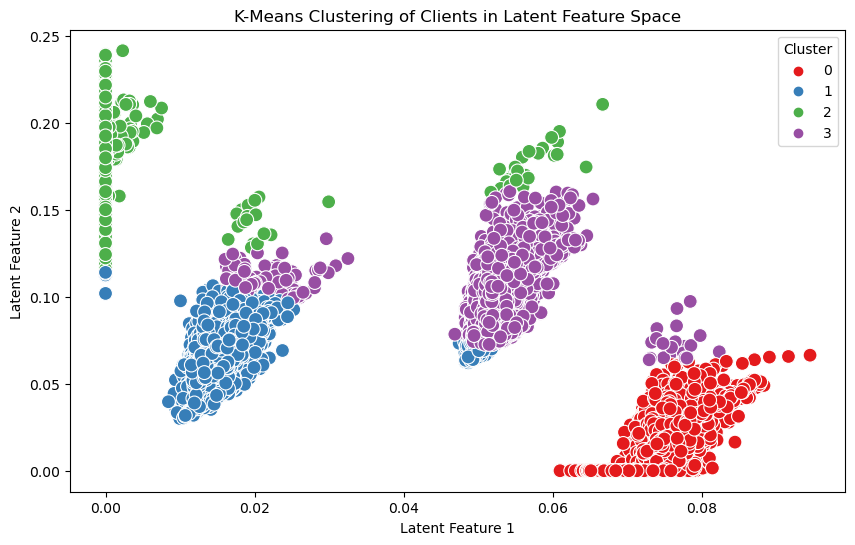


Feature Weights from NMF:
0                 LIMIT_BAL        SEX  EDUCATION  MARRIAGE       AGE  \
Latent Feature 1   2.155156  13.721197   3.717519  6.227979  2.809388   
Latent Feature 2   0.782248   0.000000   2.139099  3.548972  1.803532   

0                    PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  ...  \
Latent Feature 1  1.996292  1.842600  1.832152  1.798396  1.774237  ...   
Latent Feature 2  1.863843  1.812109  1.764339  1.695090  1.628233  ...   

0                 BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
Latent Feature 1   2.404081   1.437268   3.497074  0.089147  0.048834   
Latent Feature 2   1.409265   0.878409   1.980896  0.032508  0.016803   

0                 PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6         Y  
Latent Feature 1  0.077691  0.105106  0.152037  0.132750  0.000000  
Latent Feature 2  0.031380  0.040145  0.059350  0.051848  5.086112  

[2 rows x 24 columns]


In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns


# Step 3: Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 3 clusters
clusters = kmeans.fit_predict(latent_features)
latent_features['Cluster'] = clusters

# Step 4: Analyze Cluster Assignments
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Add cluster labels to the original data
data_with_clusters = pd.concat([data, latent_features['Cluster']], axis=1)
print("\nData with Cluster Labels:")
print(data_with_clusters)

# Step 5: Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Latent Feature 1", y="Latent Feature 2", 
    hue="Cluster", data=latent_features, palette="Set1", s=100
)
plt.title("K-Means Clustering of Clients in Latent Feature Space")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.legend(title="Cluster")
plt.show()

# Step 6: Interpret the Feature Weights
feature_weights = pd.DataFrame(H, columns=data.columns, index=['Latent Feature 1', 'Latent Feature 2'])
print("\nFeature Weights from NMF:")
print(feature_weights)


In [25]:
print("Feature Weights from NMF:")
print(feature_weights)

# Interpret Latent Feature 1
print("\nContribution to Latent Feature 1:")
print(feature_weights.loc['Latent Feature 1'].sort_values(ascending=False))

# Interpret Latent Feature 2
print("\nContribution to Latent Feature 2:")
print(feature_weights.loc['Latent Feature 2'].sort_values(ascending=False))


Feature Weights from NMF:
0                 LIMIT_BAL        SEX  EDUCATION  MARRIAGE       AGE  \
Latent Feature 1   2.155156  13.721197   3.717519  6.227979  2.809388   
Latent Feature 2   0.782248   0.000000   2.139099  3.548972  1.803532   

0                    PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  ...  \
Latent Feature 1  1.996292  1.842600  1.832152  1.798396  1.774237  ...   
Latent Feature 2  1.863843  1.812109  1.764339  1.695090  1.628233  ...   

0                 BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
Latent Feature 1   2.404081   1.437268   3.497074  0.089147  0.048834   
Latent Feature 2   1.409265   0.878409   1.980896  0.032508  0.016803   

0                 PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6         Y  
Latent Feature 1  0.077691  0.105106  0.152037  0.132750  0.000000  
Latent Feature 2  0.031380  0.040145  0.059350  0.051848  5.086112  

[2 rows x 24 columns]

Contribution to Latent Feature 1:
0
SEX          13.721197
MARRIAGE      6.22

In [37]:
feature_weights

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
Latent Feature 1,2.155156,13.721197,3.717519,6.227979,2.809388,1.996292,1.842600,1.832152,1.798396,1.774237,...,2.404081,1.437268,3.497074,0.089147,0.048834,0.077691,0.105106,0.152037,0.132750,0.000000
Latent Feature 2,0.782248,0.000000,2.139099,3.548972,1.803532,1.863843,1.812109,1.764339,1.695090,1.628233,...,1.409265,0.878409,1.980896,0.032508,0.016803,0.031380,0.040145,0.059350,0.051848,5.086112


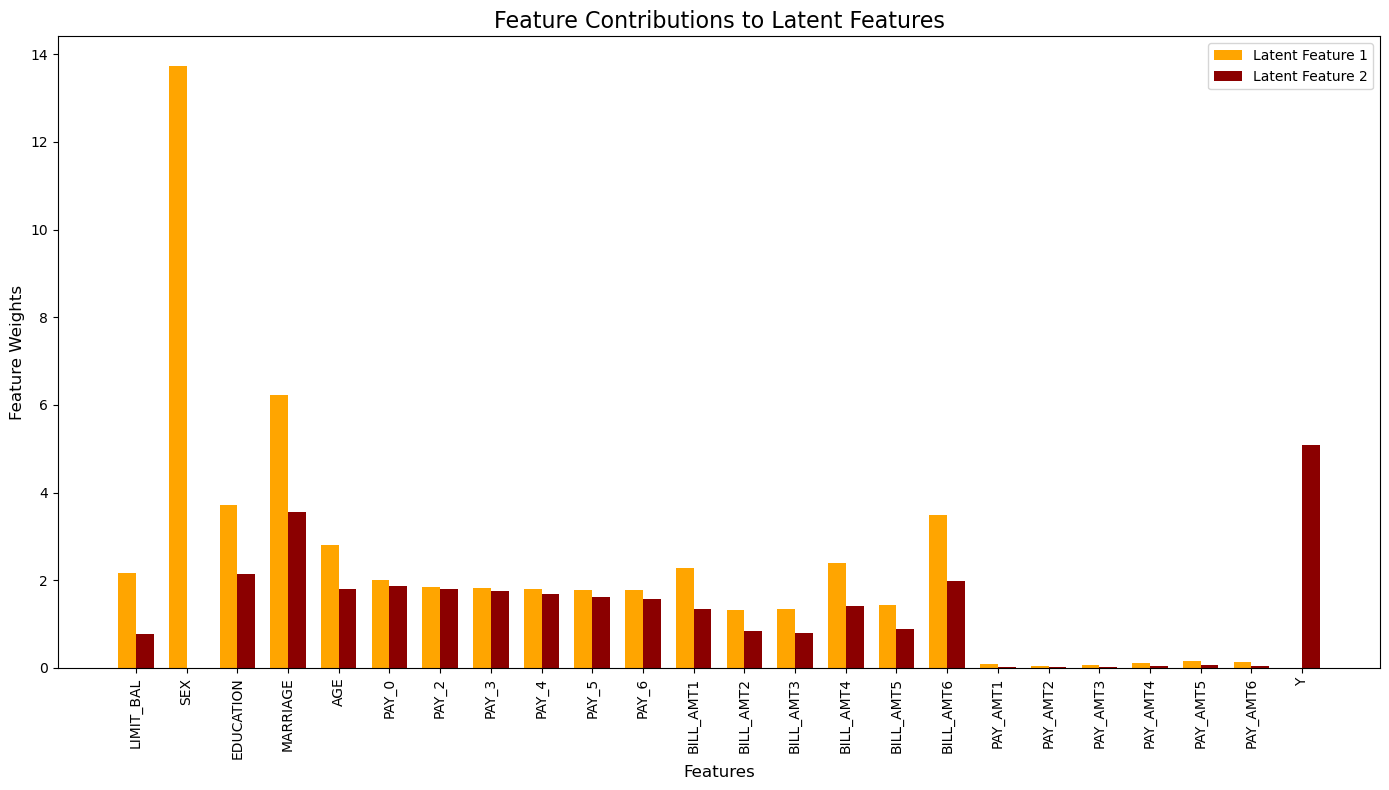

In [42]:
# Plot feature contributions for both latent features
plt.figure(figsize=(14, 8))
bar_width = 0.35
x = range(len(feature_weights.columns))

# Bar plots
plt.bar(x, feature_weights.loc["Latent Feature 1"], bar_width, label="Latent Feature 1", color="orange")
plt.bar([i + bar_width for i in x], feature_weights.loc["Latent Feature 2"], bar_width, label="Latent Feature 2", color="darkred")

# Add labels and title
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature Weights", fontsize=12)
plt.title("Feature Contributions to Latent Features", fontsize=16)
plt.xticks([i + bar_width / 2 for i in x], (feature_weights.columns), rotation=90, fontsize=10)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


The **NMF feature weights** provide insights into how the original features contribute to the two **latent features**. 

---

### **Latent Feature 1 Interpretation**  
- **Top Contributors**:
  1. `SEX` (13.72)  
  2. `MARRIAGE` (6.23)  
  3. `EDUCATION` (3.72)  
  4. `BILL_AMT6` (3.50)  
  5. `AGE` (2.81)  

- **Key Observations**:
  - **Demographic Features** (like `SEX`, `MARRIAGE`, `EDUCATION`, and `AGE`) dominate this latent feature.  
  - Some **bill amounts** (`BILL_AMT6`, `BILL_AMT4`, `BILL_AMT1`) also have moderate contributions.
  - **Payments** (`PAY_AMT1`, `PAY_AMT2`, etc.) contribute very little.  

- **Meaning**:
  - **Latent Feature 1** likely captures **client demographics and credit utilization**.  
  - This latent feature is influenced by the characteristics of the client (e.g., marital status, education level) and their outstanding bill amounts, rather than actual payments.  

---

### **Latent Feature 2 Interpretation**  
- **Top Contributors**:
  1. `Y` (5.08) (Default Payment Indicator)  
  2. `MARRIAGE` (3.55)  
  3. `EDUCATION` (2.14)  
  4. `BILL_AMT6` (1.98)  
  5. `PAY_0` (1.86)  
  6. `PAY_2` (1.81)  

- **Key Observations**:
  - The **default payment variable (`Y`)** is the highest contributor to this feature.  
  - Repayment statuses (`PAY_0`, `PAY_2`, etc.) and some `BILL_AMT` values contribute significantly.  
  - **Demographic variables** (`MARRIAGE`, `EDUCATION`) also contribute but to a lesser extent.  

- **Meaning**:
  - **Latent Feature 2** captures **default risk and payment behavior**.  
  - Clients' default status (`Y`) strongly influences this feature, along with their payment history (`PAY_0`, `PAY_2`).

---

### **Summary**
1. **Latent Feature 1**:
   - Captures **demographics** (e.g., sex, marriage, education) and **credit utilization** patterns (bill amounts).
   - It seems to describe **general client behavior and profile**.

2. **Latent Feature 2**:
   - Captures **default risk** and **payment behavior** (repayment delays, outstanding bills).
   - It seems to describe **clients’ likelihood of defaulting**.

---

### **Practical Implications**
1. **Cluster Analysis**:
   - Clients with higher **Latent Feature 2** values may be **high-risk clients** due to their strong correlation with `Y` (default).
   - Clients with higher **Latent Feature 1** values can be analyzed for spending patterns or segmented based on demographics.

2. **Risk Management**:
   - Focus on **Cluster 2** (green points) or groups with high contributions to **Latent Feature 2** to identify and manage risky clients.

3. **Feature Selection**:
   - Features like `SEX` in **Latent Feature 1** or `Y` and `PAY_0` in **Latent Feature 2** are strong contributors. These features can be prioritized in further models.

---

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the latent features (W) and the target variable Y are available
latent_features['Y'] = data['Y']  # Add the target variable to latent features

# Step 1: Perform K-Means Clustering on Latent Features
kmeans = KMeans(n_clusters=4, random_state=42)
latent_features['Cluster'] = kmeans.fit_predict(latent_features[['Latent Feature 1', 'Latent Feature 2']])

# Step 2: Analyze Default Rates within Each Cluster
cluster_summary = latent_features.groupby('Cluster')['Y'].agg(['mean', 'count'])
cluster_summary.rename(columns={'mean': 'Default Rate', 'count': 'Client Count'}, inplace=True)
print("\nDefault Rate and Client Count per Cluster:")
print(cluster_summary)


# Step 4: Visualize Default Rates as a Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(cluster_summary.index, cluster_summary['Default Rate'], color='lightcoral')
plt.title("Default Rate per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Default Rate")
plt.xticks(cluster_summary.index)
plt.show()


In [ ]:
# Compute correlations between latent features and the target variable
correlations = latent_features.corrwith(latent_features['Y'])
print("Correlation of Latent Features with Default Payments:")
print(correlations)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = latent_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)

# Add title and labels
plt.title("Correlation Heatmap of Latent Features and Default Payments", fontsize=14)
plt.show()


# Expected Insights:

- Latent Feature 1 has a strong positive correlation (e.g., 0.6), it means clients with higher values for this feature are more likely to default.
- Latent Feature 2 has a weak or negative correlation, it suggests this feature is not strongly linked to default behavior.

In [ ]:
# Identify clients with high values of Latent Feature 1 (example threshold)
high_risk_clients = latent_features[latent_features['Latent Feature 1'] > latent_features['Latent Feature 1'].quantile(0.75)]

# Check how many high-risk clients defaulted
high_risk_default_rate = high_risk_clients['Y'].mean()
print(f"Default Rate Among High-Risk Clients: {high_risk_default_rate:.2f}")

# Display a few high-risk clients
print("High-Risk Clients:")
print(high_risk_clients.head())

In [ ]:
# Merge clusters with the original data for analysis
clustered_data = pd.concat([data, latent_features[['Cluster']]], axis=1)

# Summarize behavior for each cluster
cluster_summary = clustered_data.groupby('Cluster').agg({
    'BILL_AMT1': 'mean',
    'PAY_AMT1': 'mean',
    'Y': 'mean'
}).rename(columns={'Y': 'Default Rate'})

print("Cluster Behavior Summary:")
print(cluster_summary)

In [ ]:
# Visualize BILL_AMT and PAY_AMT behaviors
plt.scatter(clustered_data['BILL_AMT1'], clustered_data['PAY_AMT1'], c=clustered_data['Cluster'], cmap='viridis')
plt.title("Bill Amount vs Payment Amount by Cluster")
plt.xlabel("BILL_AMT1")
plt.ylabel("PAY_AMT1")
plt.colorbar(label='Cluster')
plt.show()
